In [1]:
#pip install bioinfokit

In [2]:
import numpy as np 
from numpy.random import seed, randn 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 
from bioinfokit.analys import stat 

# Central Limit Theorem

The central limit theorem establishes in probability theory that when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.
<br>
<br>
In simpler terms, it states that if we have a sample $S$, with a probability distribution which is NOT normally distributed, and we take sample $S_i$ multiple number of times, then the probability distribution for an independent random variable which is calculated from $S_i$ (like the sample mean), will tend to be normally distributed if we take a sufficiently large number of samples.

## Sampling distribution of Sample Means

In [3]:
#create a list to store sample means
means = []
#repeat experiment 100 times
for i in range(100):
    #generate a random array of 10 values, with values between 0 and 1
    arr = np.random.rand(10)
    #calculate mean of random sample
    s_mean = np.mean(arr)
    #add s_mean to list 
    means.append(s_mean)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


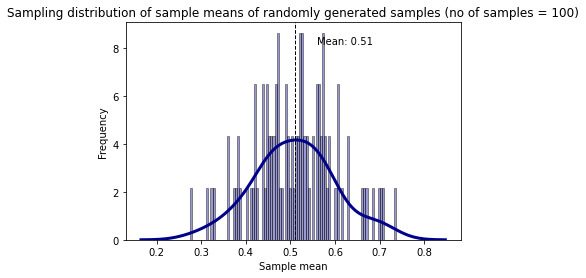

In [4]:
#Plot it along with the mean of the distribution
sns.distplot(means, hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

#Calculate the mean
mean = sum(means)/ len(means)

#Plot the mean over the distribution to get a sense of the central tendency
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean))

plt.title("Sampling distribution of sample means of randomly generated samples (no of samples = 100)")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


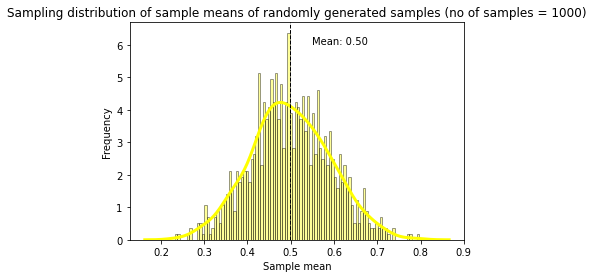

In [5]:
#Lets repeat this with 1000 and 10000 samples
#for 1000 times
means = []
for i in range(1000):
    arr = np.random.rand(10)
    s_mean = np.mean(arr)
    means.append(s_mean)

sns.distplot(means, hist=True, kde=True, 
             bins=100, color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

mean = sum(means)/ len(means)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean))

plt.title("Sampling distribution of sample means of randomly generated samples (no of samples = 1000)")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


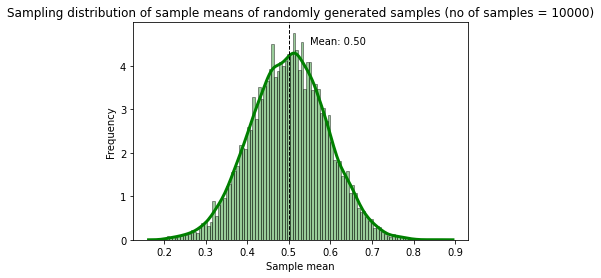

In [6]:
#for 10000 times
means = []
for i in range(10000):
    arr = np.random.rand(10)
    s_mean = np.mean(arr)
    means.append(s_mean)

sns.distplot(means, hist=True, kde=True, 
             bins=100, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

mean = sum(means)/ len(means)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)  
min_ylim, max_ylim = plt.ylim() 
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean)) 

plt.title("Sampling distribution of sample means of randomly generated samples (no of samples = 10000)")   
plt.xlabel("Sample mean")   
plt.ylabel("Frequency")   

plt.show()    

Great! Doesn't this look similar to a normal distribution?

In [7]:
#pip install pydataset

# Hypothesis Testing
Statistical hypothesis tests are predicated on a statement known as the **null hypothesis**, which asserts that nothing noteworthy is happening between the variables being tested. The null hypothesis differs depending on the type of test: if you are testing whether groups vary, the null hypothesis states that the groups are the same. For example, if you wanted to see if the average age of voters in your state differed from the national average, the null hypothesis would be that there is no difference.

A hypothesis test is used to examine if the null hypothesis is likely to be true given the sample data. Given the data, you accept the null hypothesis if there is minimal evidence against it. If the null hypothesis is unlikely based on the facts, you may reject it in favour of the **alternative hypothesis**: that something interesting is happening. The precise form of the alternative hypothesis will be determined by the specific test you are performing. Continuing with the previous example, the alternative hypothesis is that the average age of voters in your state differs from the national average.

You select a significance level (typically symbolised by the Greek letter $alpha$) once you have the null and alternative hypothesis in hand. The significance level is a probability threshold that decides when the null hypothesis is rejected. After performing a test, you reject the null hypothesis in favour of the alternative if the probability of generating a result as extreme as the one you observed by chance is less than the significance threshold. The **p-value** is the likelihood of seeing a result that is as extreme or more extreme than the one observed.

* $p \leq \alpha:$ reject **null hypothesis**.
* $p > \alpha:$ fail to reject **null hypothesis**.

This tutorial is divided into 4 parts; they are:
* Normality Tests
    * Shapiro-Wilk Test
    * D'Agostino's K^2 Test
    * Anderson-Darling Test
* Correlation Tests
    * Pearson's Correlation Coefficient
    * Spearman's Rank Correlation
    * Kendall's Rank Correlation
    * Chi-Squared Test
* Parametric Statistical Hypothesis Tests
    * T-test
        * one sample t-test
        * two sample t-test
        * Paired sample t-test
    * Z-test
        * one sampled z-test
        * two sampled z-test
    * F-test
* Nonparametric Statistical Hypothesis Tests
    * Mann-Whitney U test
    * Wilcoxon Signed-Rank test 

# Normality Tests
An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests.

## Visual Normality Checks
We can create plots of the data to check whether it is Gaussian. These checks are qualitative, so less accurate than the statistical methods.

### Histogram Plot
A simple and commonly used plot to quickly check the distribution of a sample of data is the histogram.

In the histogram, the data is divided into a pre-specified number of groups called bins. The data is then sorted into each bin and the count of the number of observations in each bin is retained.

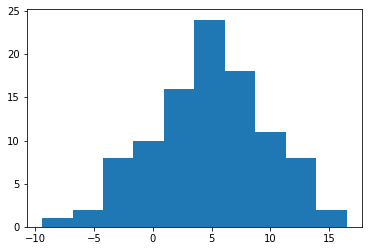

In [8]:
# seed the random number generator
seed(40)

# generate univariate observations
data = 5*randn(100)+5

# histogram plot
plt.hist(data)
plt.show()

We can see a Gaussian-like shape to the data, that although is not strongly the familiar bell-shape, is a rough approximation.

In [9]:
from pydataset import data

# Load as a dataframe
df = data('tips')
df.head() 

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


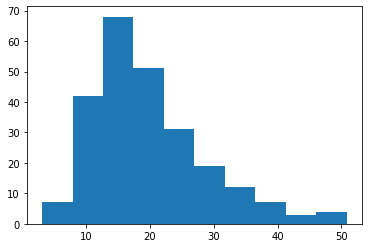

In [10]:
# histogram plot
plt.hist(df['total_bill'])
plt.show() 

We can see a non-Gaussian like shape of data.

### Quantile-Quantile Plot
Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


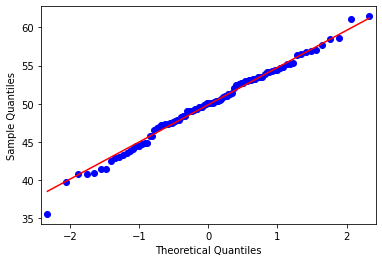

In [11]:
from statsmodels.graphics.gofplots import qqplot

# seed the random number generator
seed(40)

# generate univariate observations
data = 5 * randn(100) + 50

# QQ plot
qqplot(data, line='s')
plt.show() 

Running the example creates the QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

There are a few small deviations, especially at the bottom of the plot, which is to be expected given the small data sample.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


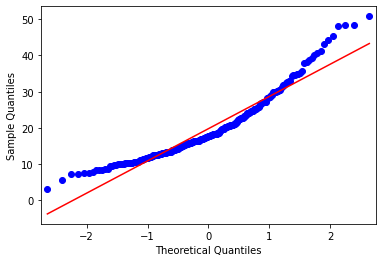

In [12]:
# QQ plot
qqplot(df['total_bill'], line='s')
plt.show()  

There are deviations, at the top and the bottom of the plot.

## Statistical Normality Tests
There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution.

Each test makes different assumptions and considers different aspects of the data.

We will look at 3 commonly used tests in this section that you can apply to your own data samples.
1. Shapiro-Wilk Test
2. D'Agostino's K^2 Test
3. Anderson-Darling Test


**Null Hypothesis:** Data follow Gaussian distribution.

**Alternative Hypothesis:** Data doesn't follow Gaussian distribution.

### Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In [13]:
from scipy.stats import shapiro

data = df['total_bill']

alpha = 0.05

stat, p = shapiro(data)

print('Statistics = %0.2f, p-value = %0.3f' %(stat, p))

if p > alpha:
    print('Data follow Normal distribution')
else:
    print('Data do not follow Normal distribution')

Statistics = 0.92, p-value = 0.000
Data do not follow Normal distribution


### D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

In [14]:
from scipy.stats import normaltest

data = df['total_bill']

alpha = 0.05

stat, p = normaltest(data)

print('Statistics = %0.2f, p-value = %0.3f' %(stat, p))

if p > alpha:
    print('Data follow Normal distribution')
else:
    print('Data do not follow Normal distribution')

Statistics = 45.12, p-value = 0.000
Data do not follow Normal distribution


### Anderson-Darling Test
Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

In [15]:
from scipy.stats import anderson

data = df['total_bill']

alpha = 0.05

result = anderson(data)
print(result)
print('Statistic: %0.3f' %result.statistic)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.significance_level[i] < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal' % (sl, cv))

AndersonResult(statistic=5.520705531383555, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.075]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Statistic: 5.521
15.000: 0.567, data does not look normal
10.000: 0.646, data does not look normal
5.000: 0.775, data does not look normal
2.500: 0.904, data does not look normal
1.000: 1.075, data looks normal


# Correlation Tests
There may be complex and unknown relationships between the variables in your dataset.

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

## Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

**Interpretation**

* **Null Hypothesis:** the two samples are independent.
* **Alternative Hypothesis:** there is a dependency between the samples.

#### Problem
To find the relationship between total bill and tip.

In [16]:
from scipy.stats import pearsonr
bill = df['total_bill']
tip = df['tip']

alpha = 0.05

stat, p = pearsonr(bill, tip)
print('statistics=%.3f, p-value=%.3f' % (stat, p))

if p > alpha:
    print('Probably independent')
else:
    print('Probably dependent')

statistics=0.676, p-value=0.000
Probably dependent


## Spearman’s Rank Correlation
Tests whether two samples have a monotonic relationship.

**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

**Interpretation**

* **Null Hypothesis:** the two samples are independent.
* **Alternative Hypothesis:** there is a dependency between the samples.

#### Problem
To find the relationship between total bill and tip.

In [17]:
from scipy.stats import spearmanr
bill = df['total_bill']
tip = df['tip']

alpha = 0.05

stat, p = spearmanr(bill, tip)
print('statistics=%.3f, p-value=%.3f' % (stat, p))

if p > alpha:
    print('Probably independent')
else:
    print('Probably dependent')

statistics=0.679, p-value=0.000
Probably dependent


## Kendall’s Rank Correlation
Tests whether two samples have a monotonic relationship.

**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

**Interpretation**

* **Null Hypothesis:** the two samples are independent.
* **Alternative Hypothesis:** there is a dependency between the samples.

#### Problem
To find the relationship between total bill and tip.

In [18]:
from scipy.stats import kendalltau
bill = df['total_bill']
tip = df['tip']

alpha = 0.05

stat, p = kendalltau(bill, tip)
print('statistics=%.3f, p-value=%.3f' % (stat, p))

if p > alpha:
    print('Probably independent')
else:
    print('Probably dependent')

statistics=0.517, p-value=0.000
Probably dependent


## Chi-Squared Test
The chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion. Let's generate some fake voter polling data and perform a test of independence:

**Assumptions**
* Observations used in the calculation of the contigency table are independent.

**Interpretation**
* **Null Hypothesis:** the two samples are independent.
* **Alternative Hypothesis:** there is a dependency between the samples.

#### Problem
Here, we take a table that shows the number of men and women buying different types of pets.

| | Dog | Cat | Bird | Total |
| --- | --- | --- | --- | --- |
| Men | 207 | 282 | 241 | 730 |
| Women | 234 | 242 | 232 | 708 |
| Total | 441 | 524 | 473 | 1438 |

The aim of the test is to conclude whether the two variables( gender and choice of pet ) are related to each other.

In [19]:
from scipy.stats import chi2_contingency

# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p-value is " + str(p))
if p <= alpha:
    print('Dependent (reject null hypothesis)')
else:
    print('Independent (null hypothesis holds true)')

p-value is 0.1031971404730939
Independent (null hypothesis holds true)


Therefore, we can conclude that is, the variables do not have significant relation.

# Parametric Statistical Hypothesis Tests
Parametric statistical methods often mean those methods that assume the data samples have a Gaussian distribution.

In applied machine learning, we need to compare data samples, specifically the mean of the samples. Perhaps to see if one technique performs better than another on one or more datasets. To quantify this question and interpret the results, we can use parametric hypothesis testing methods such as the Student’s t-test, z-test, f-test and ANOVA.

## T-test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.
<br>
<br>
t-test has 2 types : 
1. one sample t-test
2. two-sample t-test.

### One sample t-test
The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

* **Left Tailed Test:**
    * **Null Hypothesis:** $\mu = \mu_0$
    * **Alternative Hypothesis:** $\mu < \mu_0$
    * **Decision Criteria:** If the $t-statistics < t-critical value$ then reject **null hypothesis**.
    
* **Right Tailed Test:**
    * **Null Hypothesis:** $\mu = \mu_0$
    * **Alternative Hypothesis:** $\mu > \mu_0$
    * **Decision Criteria:** If the $t-statistics > t-critical value$ then reject **null hypothesis**.
    
* **Two Tailed Test:**
    * **Null Hypothesis:** $\mu = \mu_0$
    * **Alternative Hypothesis:** $\mu \neq \mu_0$
    * **Decision Criteria:** If the $t-statistics > t-critical value$ then reject **null hypothesis**.

#### Problem
we want to determine if on average girls score more than $600$ in the exam. We do not have the information related to variance (or standard deviation) for girls’ scores. To a perform t-test, we randomly collect the data of $10$ girls with their marks and choose our $\alpha$ value (significance level) to be $0.05$ for Hypothesis Testing.

|Marks(Girls)|
| --- |
| 587 |
| 602 |
| 627 |
| 610 |
| 619 |
| 622 |
| 605 |
| 608 |
| 596 |
| 592 |

**Null Hypothesis:** $\mu \leq 600 $

**Alternative Hypothesis:** $\mu > 600 $

In [20]:
marks = [587, 602, 627, 610, 619, 622, 605, 608, 596, 592]

In [21]:
from scipy.stats import ttest_1samp

marks_mean = np.mean(marks)
print("\n The average marks of 10 girls:", marks_mean)

t_value, p_value = ttest_1samp(marks, 600)
one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('\n test statistics is',t_value)
print("\n p-values",p_value)


 The average marks of 10 girls: 606.8

 test statistics is 1.6366678867044733

 p-values 0.1361270069204197


In [22]:
alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''')

else:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,"We do not reject the null hypothesis H0.")

Conclusion 
 Since p-value(=0.136127) > alpha(=0.05) We do not reject the null hypothesis H0.


We fail to reject the null hypothesis and don't have enough evidence to support the hypothesis that on average, girls score more than $600$ in the exam.

### Two sample t-test
The Independent Samples t test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a **parametric test**. This test is also known as **Independent t test**.

#### Problem
we want to determine if on average, boys marks and girls marks in the exam is equal. We do not have the information related to variance (or standard deviation) for girls’ scores or boys’ scores. To perform a t-test. we randomly collect the data of $10$ girls and boys with their marks. We choose our $\alpha$ value (significance level) to be $0.05$ as the criteria for Hypothesis Testing.

| Marks(Girls) | Marks(Boys) |
| --- | --- |
| 587 | 626 |
| 602 | 643 |
| 627 | 647 |
| 610 | 634 |
| 619 | 630 |
| 622 | 649 |
| 605 | 625 |
| 608 | 623 |
| 596 | 617 |
| 592 | 607 |

**Null Hypothesis:** $\mu_1 = \mu_2$

**Alternative Hypothesis:** $\mu_1 \neq \mu_2$

In [23]:
girls = [587, 602, 627, 610, 619, 622, 605, 608, 596, 592]
boys = [626, 643, 647, 634, 630, 649, 625, 623, 617, 607]

In [24]:
from scipy.stats import ttest_ind

t_value,p_value = ttest_ind(girls,boys)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is -3.921956
p-value for two tailed test is 0.000999


In [25]:
alpha = 0.05

if p_value<=alpha:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''')

else:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,"We do not reject the null hypothesis H0.")

Conclusion 
 Since p-value(=0.000999) < alpha(=0.05) We reject the null hypothesis H0.


We can conclude that average marks scored by boys and girls have significant difference.

### Paired sample t-test
The paired sample t-test is also called dependent sample t-test. It is an univariate test that tests for a significant difference between 2 related variables.

#### Problem
Eleven schoolboys were given a test in Statistics. They were given a Month’s tuition and a second test were held at the end of it. Do the marks give evidence that the students have benefited from the exam coaching?

|Marks ($1^{st}$ test)| Marks ($2^{nd}$ test) |
| --- | --- |
| 23 | 24 |
| 20 | 19 |
| 19 | 22 |
| 21 | 18 |
| 18 | 20 |
| 20 | 22 |
| 18 | 20 |
| 17 | 20 |
| 23 | 23 |
| 16 | 20 |
| 19 | 18 |

**Null Hypothesis $H_0$**: The students have not benefited from the tution class i.e., $d = 0$
<br>
**Alternative Hypothesis $H_1$**: The students have benefited from the tuition class. i.e., $d < 0$
<br>
Where, $d = x-y$; $d$ is the difference between marks in the first test (say $x$) and marks in the second test (say $y$)

In [26]:
first_test =[23, 20, 19, 21, 18, 20, 18, 17, 23, 16, 19]
second_test=[24, 19, 22, 18, 20, 22, 20, 20, 23, 20, 18]

In [27]:
from scipy.stats import ttest_rel

t_value,p_value = ttest_rel(first_test,second_test)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

Test statistic is -1.707331
p-value for one_tailed_test is 0.059282


In [28]:
if one_tailed_p_value<=alpha:

    print('Conclusion','\n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that the students have benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','\n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the students have not benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)

Conclusion 
 Since p-value(=0.059282) > alpha(=0.05) We do not reject the null hypothesis H0. 

So we conclude that the students have not benefited by the tuition class. i.e., d = 0 at 0.05 level of significance.


## Z-test
A z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large.
<br>
<br>
z-test has 2 types :
1. one sampled z-test
2. two sampled z-test.

**Note**: Your sample size is greater than $30$. Otherwise, use a t test.

### One sample z-test
A one-sample z test is used to check if there is a difference between the sample mean and the population mean when the population standard deviation is known.

* **Left Tailed Test:**
    * **Null Hypothesis:** $\mu = \mu_0$
    * **Alternative Hypothesis:** $\mu < \mu_0$
    * **Decision Criteria:** If the $z-statistics < z-critical value$ then reject **null hypothesis**.
    
* **Right Tailed Test:**
    * **Null Hypothesis:** $\mu = \mu_0$
    * **Alternative Hypothesis:** $\mu > \mu_0$
    * **Decision Criteria:** If the $z-statistics > z-critical value$ then reject **null hypothesis**.
    
* **Two Tailed Test:**
    * **Null Hypothesis:** $\mu = \mu_0$
    * **Alternative Hypothesis:** $\mu \neq \mu_0$
    * **Decision Criteria:** If the $z-statistics > z-critical value$ then reject **null hypothesis**.

#### Problem
Let’s say we need to determine if girls on average ($\mu$) score higher than $600$ in the exam. We have the information that the standard deviation ($\sigma$) for girls’ scores is $100$. So, we collect the data of $20$ girls by using random samples and record their marks. Finally, we also set our $\alpha$ value (significance level) to be $0.05$.

marks = $[650, 730, 510, 670, 480, 800, 690, 530, 590, 620, 710, 670, 640, 780, 650, 490, 800, 600, 510, 700]$

**Null Hypothesis:** $\mu \leq 600$

**Alternative Hypothesis:** $\mu > 600$

In [29]:
marks = [650, 730, 510, 670, 480, 800, 690, 530, 590, 620, 710,
         670, 640, 780, 650, 490, 800, 600, 510, 700]

In [30]:
from statsmodels.stats.weightstats import ztest

z_value, p_value = ztest(marks, value=600)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(z_value)))

print('p-value is %f'%p_value)

Test statistic is 1.831745
p-value is 0.066989


In [31]:
alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0''')

else:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,"We do not reject the null hypothesis H0.")

Conclusion 
 Since p-value(=0.066989) < alpha(=0.05) We reject the null hypothesis H0


We can conclude that Girls on average scored higher than $600$.

### Two sample z-test
We perform a Two Sample Z test when we want to compare the mean of two samples.

#### Problem
we want to know if Girls on average score $10$ marks more than the boys. We have the information that the standard deviation for girls’ Score is $100$ and for boys’ score is $90$. Then we collect the data of $20$ girls and $20$ boys by using random samples and record their marks. Finally, we also set our $\alpha$ value (significance level) to be $0.05$.

|Marks (Girls)| Marks (Boys)|
| --- | --- |
| 650 | 630 |
| 730 | 720 |
| 510 | 462 |
| 670 | 631 |
| 480 | 440 |
| 800 | 783 |
| 690 | 673 |
| 530 | 519 |
| 590 | 543 |
| 620 | 579 |
| 710 | 677 |
| 670 | 649 |
| 640 | 632 |
| 780 | 768 |
| 650 | 615 |
| 490 | 463 |
| 800 | 781 |
| 600 | 563 |
| 510 | 488 |
| 700 | 650 |

**Null Hypothesis:** $\mu_1 - \mu_2 \leq 10$

**Alternative Hypothesis:** $\mu_1 - \mu_2 > 10$

In [32]:
girls = [650, 730, 510, 670, 480, 800, 690, 530, 590, 620, 710, 670,
        640, 780, 650, 490, 800, 600, 510, 700]
boys = [630, 720, 462, 631, 440, 783, 673, 519, 543, 579, 677, 649, 632,
       768, 615, 463, 781, 563, 488, 650]

In [33]:
z_value, p_value = ztest(girls, boys, value=10)

print('Test statistic is %f'%float("{:.6f}".format(z_value)))

print('p-value is %f'%p_value)

Test statistic is 0.543812
p-value is 0.586571


In [34]:
alpha = 0.05

if p_value<=alpha:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.
    
So we conclude that mean IQ level of two cities are different at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,"We do not reject the null hypothesis H0.")

Conclusion 
 Since p-value(=0.586571) > alpha(=0.05) We do not reject the null hypothesis H0.


Thus, we can conclude based on **p-value** that we fail to reject the **Null Hypothesis**. We don’t have enough evidence to conclude that girls on average score of 10 marks more than the boys. 

## F-test
An F-test is used to test whether two population variances are equal.
$$F value = \frac{\sigma_1^2}{\sigma_2^2}$$
where $\sigma_1^2 > \sigma_2^2$

### Hypothesis
**Null Hypothesis $H_0$**: two population variance are equal i.e., $\sigma_1^2 = \sigma_2^2$
<br>
**Alternative Hypothesis $H_1$**: two population variance are not equal i.e., $\sigma_1^2 \neq \sigma_2^2$

### Problem
Lin Xiang, a young banker, has moved from Saskatoon, Saskatchewan, to Winnipeg, Manitoba, where she has recently been promoted and made the manager of City Bank, a newly established bank in Winnipeg with branches across the Prairies. After a few weeks, she has discovered that maintaining the correct number of tellers seems to be more difficult than it was when she was a branch assistant manager in Saskatoon. Some days, the lines are very long, but on other days, the tellers seem to have little to do. She wonders if the number of customers at her new branch is simply more variable than the number of customers at the branch where she used to work. Because tellers work for a whole day or half a day (morning or afternoon), she collects the following data on the number of transactions in a half day from her branch and the branch where she used to work:

Winnipeg branch: $156, 278, 134, 202, 236, 198, 187, 199, 143, 165, 223$

Saskatoon branch: $345, 332, 309, 367, 388, 312, 355, 363, 381$

In [35]:
x = [156, 278, 134, 202, 236, 198, 187, 199, 143, 165, 223]
y = [345, 332, 309, 367, 388, 312, 355, 363, 381]

In [36]:
import scipy
def f_test(x,y):
    x = np.array(x)
    y = np.array(y)
    
    # calculate F test statistics
    if np.var(x, ddof=1) > np.var(y,ddof=1):
        f = np.var(x, ddof = 1)/np.var(y, ddof = 1)
    else:
        f = np.var(y, ddof = 1)/np.var(x, ddof = 1)
        
    # define degree of freedom numerator
    dfn = x.size-1
    # define degree of freedom denominator
    dfd = y.size-1
    
    #find p-value of f test statistics
    p = 1 - scipy.stats.f.cdf(f,dfn,dfd)
    
    return f,p

In [37]:
f_value, p_value = f_test(x,y)

print('Test statistic is %f'%float("{:.6f}".format(f_value)))

print('p-value is %f'%p_value)

Test statistic is 2.299518
p-value is 0.125336


In [38]:
alpha = 0.05

if p_value<=alpha:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.
    
So we conclude that two population variance are not equal at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','\n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,"We do not reject the null hypothesis H0.")

Conclusion 
 Since p-value(=0.125336) > alpha(=0.05) We do not reject the null hypothesis H0.


She concludes that the variance of customers in her office is the same as it was in the old office.

# Nonparametric Statistical Hypothesis Tests
If the data does not have the familiar Gaussian distribution, we must resort to nonparametric version of the significance tests. These tests operate in a similar manner, but are distribution free, requiring that real valued data be first transformed into rank data before the test can be performed.

The null hypothesis of these tests is often the assumption that both samples were drawn from a population with the same distribution, and therefore the same population parameters, such as mean or median.

If after calculating the significance test on two or more samples the null hypothesis is rejected, it indicates that there is evidence to suggest that samples were drawn from different populations, and in turn the difference between sample estimates of population parameters, such as means or medians may be significant.

## Mann-Whitney U Test
The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The test was named for Henry Mann and Donald Whitney, although it is sometimes called the Wilcoxon-Mann-Whitney test, also named for Frank Wilcoxon, who also developed a variation of the test.

**Null Hypothesis:** There is no difference between the distribution of the data samples.

**Alternative Hypothesis:** There is likely some difference between the samples.

### Problem
Suppose patients are suffering from cancer. They are divided into three groups and different drugs were administered. The platelet count for the patients is given in the table below. It needs to be checked if the population medians are equal. The significance level is $0.05$.

| Drug 1 | Drug 2 |
| --- | --- |
| 42000 | 78000 |
| 48000 | 89000 |
| 57000 | 67000 |
| 69000 | 80000 |
| 45000 | |

In [39]:
# code for Mann-Whitney U test
from scipy.stats import mannwhitneyu
# Take Drug 1 and Drug 2 data as per above example
Drug_1 =[42000, 48000, 57000, 69000, 45000]
Drug_2 = [78000, 89000, 67000, 80000]

# perform mann whitney test
stat, p_value = mannwhitneyu(Drug_1, Drug_2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))

# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=1.00, p=0.03
Reject Null Hypothesis (Significant difference between two samples)


## Wilcoxon Signed-Rank Test
The Wilcoxon signed ranks test is a nonparametric statistical procedure for comparing two samples that are paired, or related.

**Null Hypothesis:** The two samples have the same distribution

**Alternative Hypothesis:** The two samples haven't same distribution

### Problem
The table below shows the hours of relief provided by two analgesic drugs in 12 patients suffering from arthritis. Is there any evidence that one drug provides longer relief than the other?

| Patient | Drug A | Drug B |
| --- | --- | --- |
| 1 | 2.0 | 3.5 |
| 2 | 3.6 | 5.7 |
| 3 | 2.6 | 2.9 |
| 4 | 2.6 | 2.4 |
| 5 | 7.3 | 9.9 |
| 6 | 3.4 | 3.3 |
| 7 | 14.9 | 16.7 |
| 8 | 6.6 | 6.0 |
| 9 | 2.3 | 3.8 |
| 10 | 2.0 | 4.0 |
| 11 | 6.8 | 9.1 |
| 12 | 8.5 | 20.9 |

In [40]:
# code for Wilcoxon Signed-Rank test
from scipy.stats import wilcoxon
Drug_A = [2.0, 3.6, 2.6, 2.6, 7.3, 3.4, 14.9, 6.6, 2.3, 2.0, 6.8, 8.5]
Drug_B = [3.5, 5.7, 2.9, 2.4, 9.9, 3.3, 16.7, 6.0, 3.8, 4.0, 9.1, 20.9]

# perform wilcoxon signed-rank test
stat, p_value = wilcoxon(Drug_A, Drug_B)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))

# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=7.00, p=0.01
Reject Null Hypothesis (Significant difference between two samples)
